# Immunization strategie

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import src.utils as utils
import src.sis as sis
import src.immun as immun
import src.data as data
import src.greedy as gr
import importlib
importlib.reload(utils)
importlib.reload(sis)
importlib.reload(immun)
importlib.reload(data)

<module 'src.data' from '\\\\wsl.localhost\\Ubuntu\\home\\leever\\immun-strat-csn\\src\\data.py'>

Get graph...
G n = 500, m = 1491, max_deg = (0, 78), transitivity = 0.03130237335784181
165 269


100%|██████████| 156/156 [00:00<00:00, 3324.92it/s]


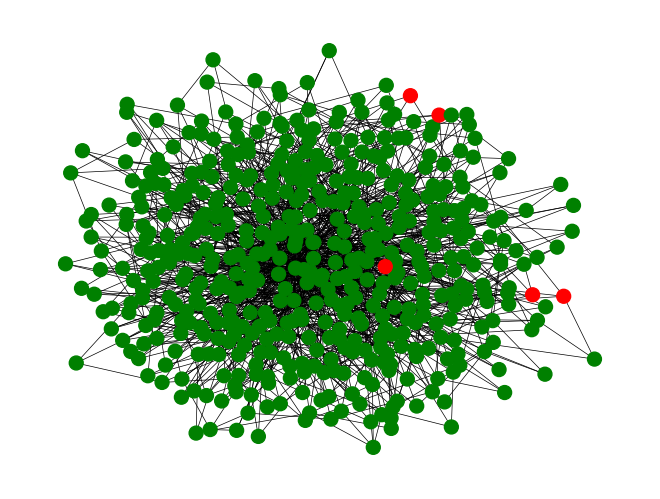

In [63]:
n = 100
seed = 100
beta = 0.4
gamma = 0.4
t_max = 12
m = 3
n_inf = 5
n_vac = 5

print("Get graph...")
G = sis.generate_barabasi_albert_graph(n, m, 10)
n = len(list(G.nodes))
utils.print_g_carac(G)
G_pg = immun.immun_page_rank(G, n_vac)

S = sis.add_random_infected(G, n_inf)
sis.add_random_infected(G_pg, n_inf)
G_gr, W = gr.greedy_algorithm(G.copy(), S, n_vac, beta, gamma)

sis.draw_g_sis(G)


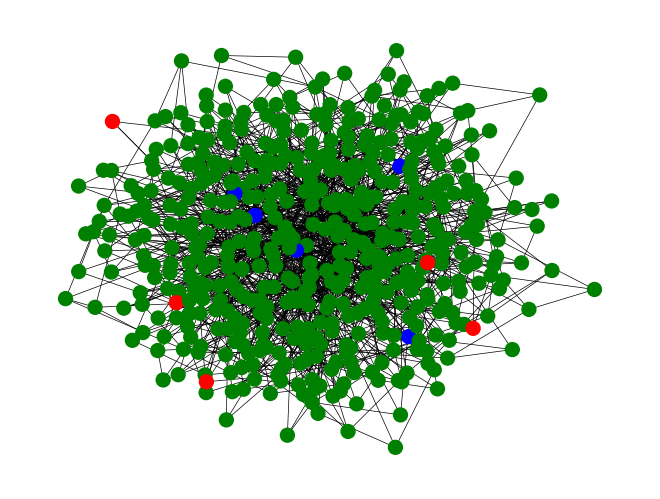

In [64]:
sis.draw_g_sis(G_gr)

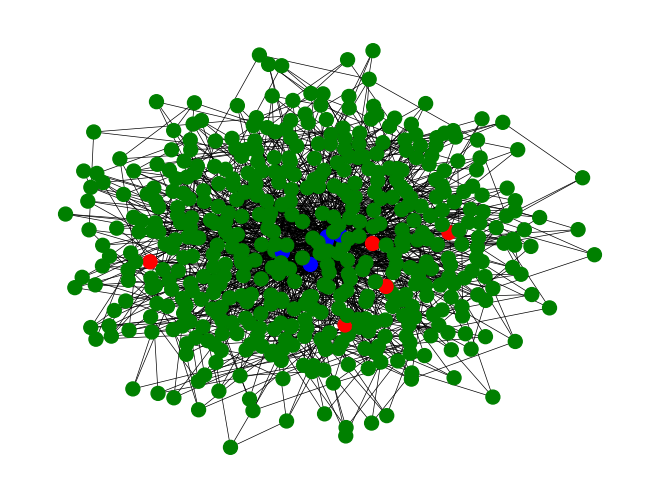

In [65]:
sis.draw_g_sis(G_pg)

[0.01, 0.01, 0.02, 0.042, 0.184, 0.418, 0.704, 0.632, 0.69, 0.642, 0.65, 0.642, 0.654]
[0.01, 0.01, 0.028, 0.084, 0.21, 0.41, 0.562, 0.658, 0.628, 0.662, 0.62, 0.602, 0.604]
[0.01, 0.01, 0.014, 0.084, 0.222, 0.436, 0.642, 0.622, 0.63, 0.622, 0.656, 0.654, 0.602]
filename: folder/image.png


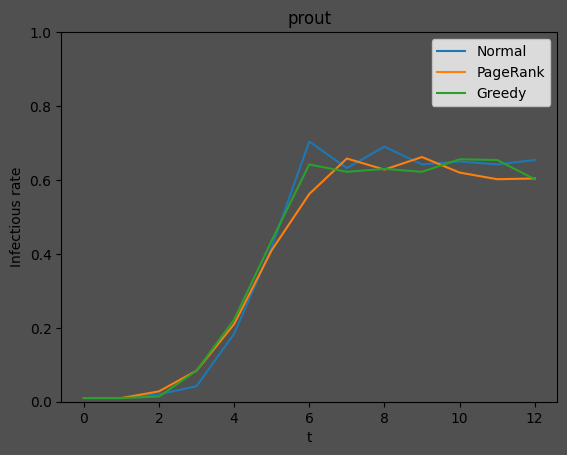

In [66]:
G_states = sis.run_sis(G, beta, gamma, t_max, start_sus=n-n_inf-n_vac, start_inf=n_inf)
G_pg_states = sis.run_sis(G_pg, beta, gamma, t_max, start_sus=n-n_inf-n_vac, start_inf=n_inf)
G_gr_states = sis.run_sis(G_gr, beta, gamma, t_max, start_sus=n-n_inf-n_vac, start_inf=n_inf)


sis.plot_infected_grow([G_states, G_pg_states, G_gr_states],
                    ["Normal", "PageRank", "Greedy"],
                    n,
                    save=False,
                    plt_title="prout")

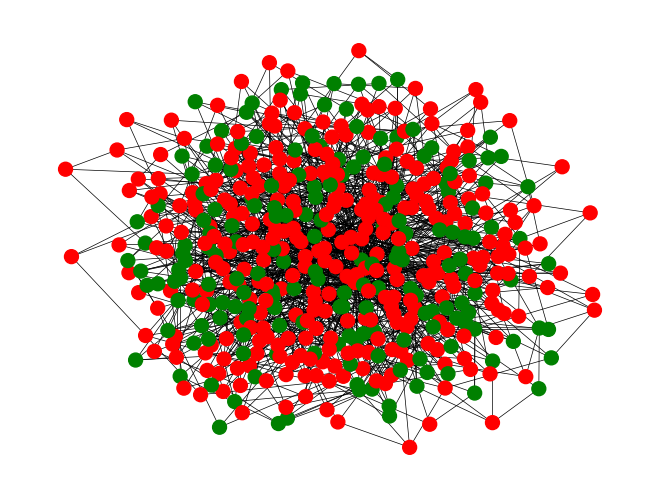

In [67]:
sis.draw_g_sis(G)

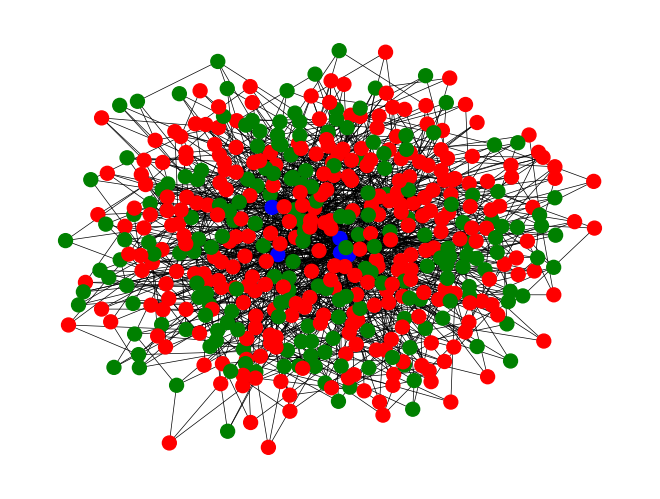

In [68]:
sis.draw_g_sis(G_pg)

In [ ]:
sis.draw_g_sis(G_gr)